###__Importing Packages__

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as skl

###__Uploading CSVs__

In [3]:
from google.colab import files
uploaded=files.upload()
graduation_rate=pd.read_csv("graduation_rate.csv")
IPR=pd.read_csv("IPR.csv")
print(graduation_rate.head(5))
print(IPR.head(5))
print(graduation_rate.columns.to_list())
print(IPR.columns.to_list())

Saving graduation_rate.csv to graduation_rate.csv
Saving IPR.csv to IPR.csv
   ACT composite score  SAT total score parental level of education  \
0                   30             2206             master's degree   
1                   26             1953                some college   
2                   28             2115            some high school   
3                   33             2110            some high school   
4                   30             2168           bachelor's degree   

   parental income  high school gpa  college gpa  years to graduate  
0            94873              4.0          3.8                  3  
1            42767              3.6          2.7                  9  
2            46316              4.0          3.3                  5  
3            52370              4.0          3.5                  4  
4            92665              4.0          3.6                  4  
           X          Y      NCESSCH                                 NAME  \


#__Kaggle 1000 Analysis__

###__Messing Around with Graphs__ (Will add more later)

AttributeError: ignored

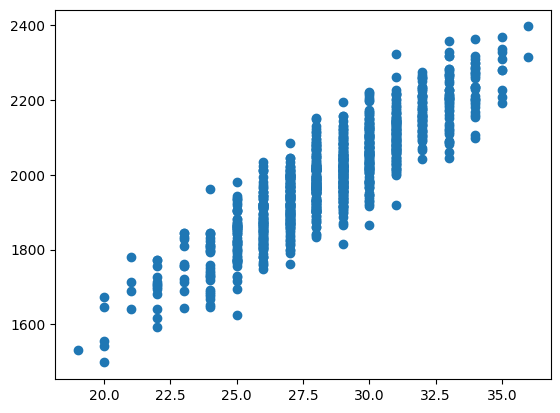

In [14]:
sat = graduation_rate['SAT total score']
act = graduation_rate['ACT composite score']
SATvsACT=plt.scatter(act,sat), plt.xlablel("SAT total score"), plt.ylabel("ACT composite Score"), plt.title("SAT Score vs. ACT Score")

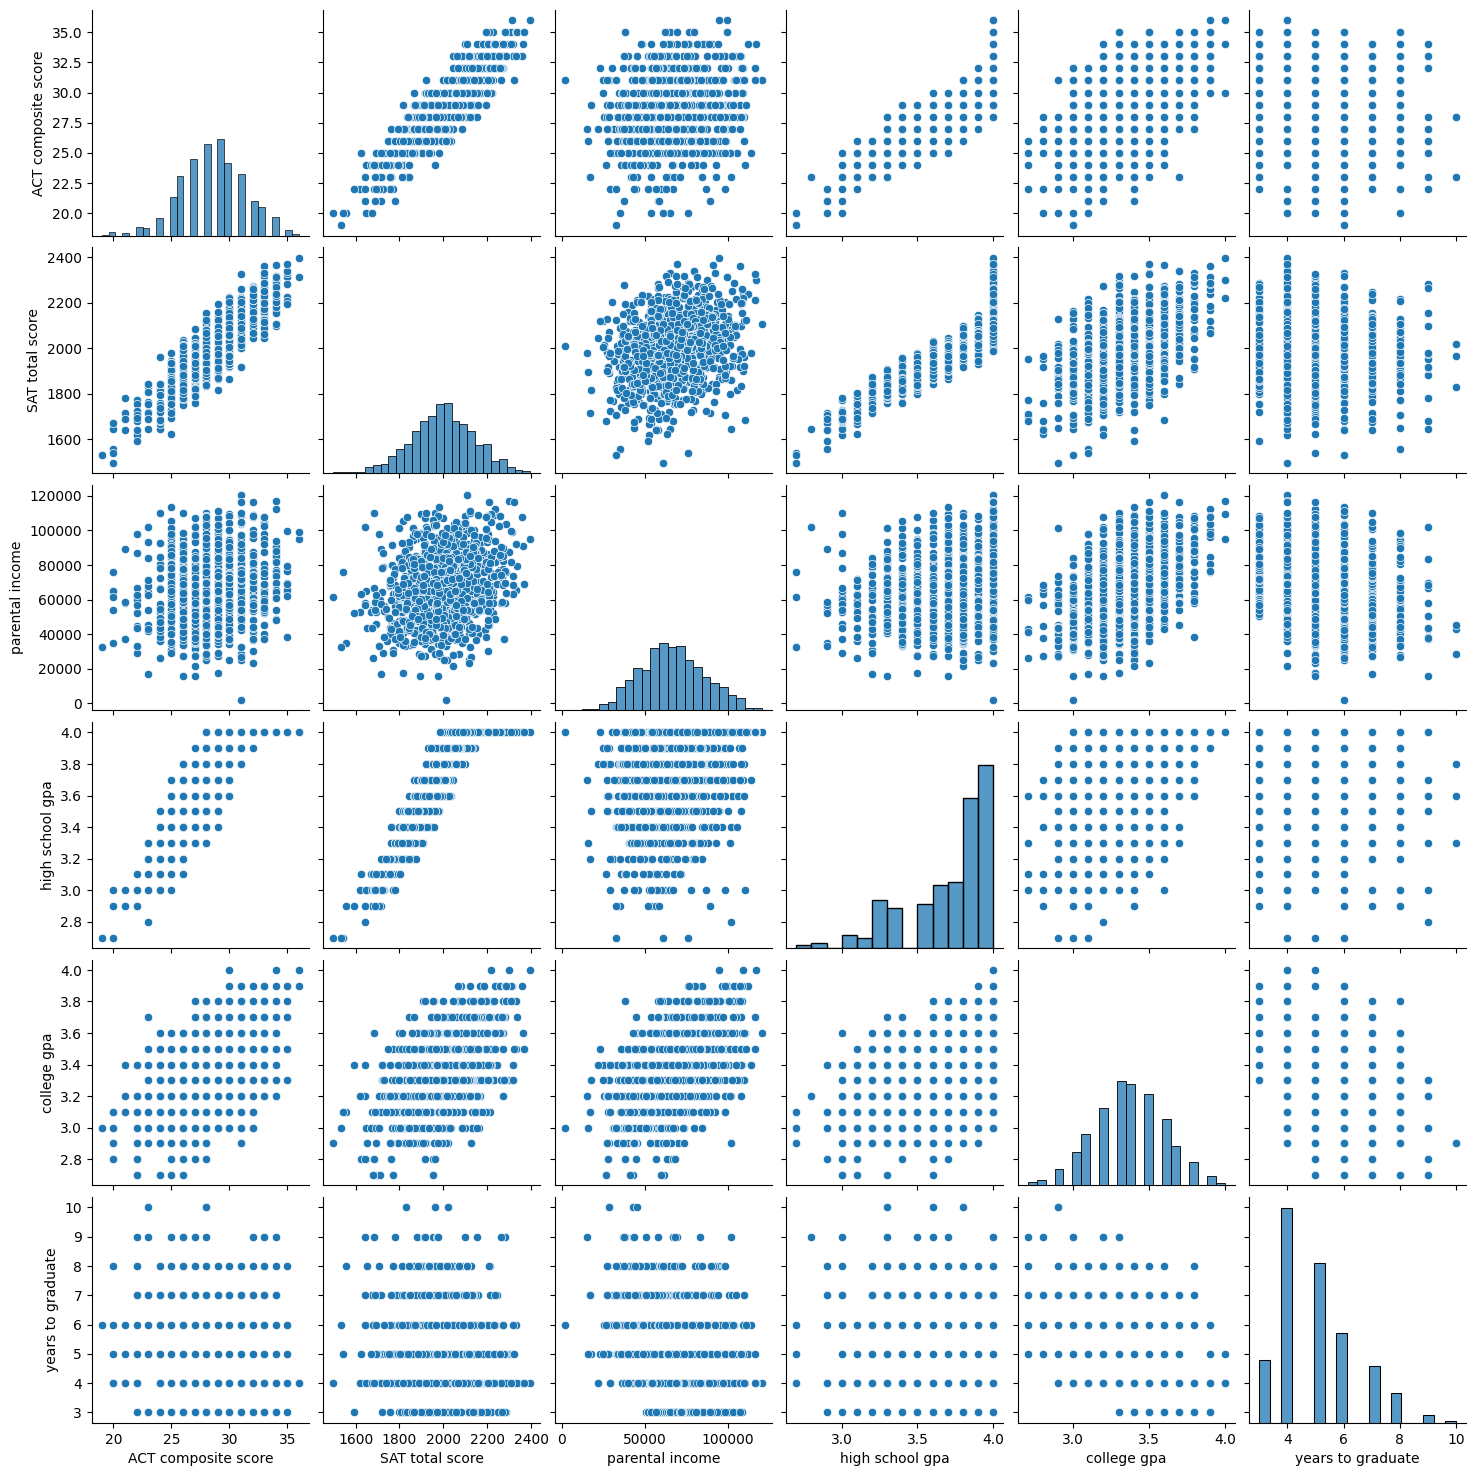

In [5]:
gradratepairwise=sns.pairplot(graduation_rate)

In [6]:
for ax in gradratepairwise.axes.flat:
    if ax.get_xlabel() != ax.get_ylabel():  # Exclude diagonal subplots/histograms
        sns.regplot(x=ax.get_xlabel(), y=ax.get_ylabel(), data=graduation_rate, ax=ax)


KeyError: ignored

In [7]:
from mpl_toolkits import mplot3d

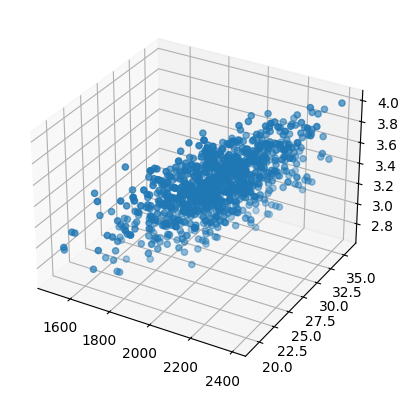

In [8]:
#This is making a graph that compares SAT and ACT score to college GPA.
satactcolgpa=plt.axes(projection='3d')
colgpa=graduation_rate["college gpa"]
satactcolgpa.scatter3D(sat,act,colgpa)

In [45]:
for column in graduation_rate.columns.to_list():
  print(column)

ACT composite score
SAT total score
parental level of education
parental income
high school gpa
college gpa
years to graduate


#__Linear Regression Models__

###__IPR to SAT Score Model__ (& Initializing Work)

In [48]:
#I am going to create a linear regression model that predicts an SAT score given an IPR value.
#This will work to predict the average SAT value of a school given its IPR value.

#This code below is just initializing some variables that will be needed
#in order to fill the list KaggleIPRvalues in the following for loop.
from sklearn.linear_model import LinearRegression
parentalincomelist=graduation_rate["parental income"].tolist()
medianhouseholdincome=70784
KaggleIPRvalues=[]

#This for loop is filling a list with our Kaggle "IPR values"
for income in parentalincomelist:
  IPRvalue=(income/medianhouseholdincome)*100
  KaggleIPRvalues.append(IPRvalue)

#Everything above this point won't need to be repeated in order to create additional models.
#This code block is actually creating our linear regression model (for IPR to SAT).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
SATtrainer = np.array(graduation_rate["SAT total score"].to_list())
SATpredictor = LinearRegression().fit(IPRtrainer,SATtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=SATpredictor.score(IPRtrainer,SATtrainer)
print("R score: {}".format(Rscore))

#And now I am going to create a dictionary that keeps track of the R score for each predictor/model that I make.
Rscoresdict={}
Rscoresdict["SAT Predictor"]=Rscore
print(Rscoresdict)

R score: 0.06128380804226963
{'SAT Predictor': 0.06128380804226963}


In [32]:
#I am not going to be worrying about any sort of real data from our data set right now. I'm just going to see if the model sort of works :)
#My previous code worked and I'm literally so proud
SATprediction=SATpredictor.predict(np.array([100]).reshape((-1, 1)))
print(SATprediction)

[2005.46718148]


In [41]:
#Sweet. That worked. Now I need to figure out how to make it do that for every single IPR in the whole data set...
def IPRtoSAT():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedSATscore=SATpredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "SAT Score Prediction"] = predictedSATscore
    n+=1

In [42]:
#Dude. Did that for real just work???
IPRtoSAT()

In [44]:
print(IPR.head(5))

           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.193289  2017-2018   

   SAT Score Prediction  
0           2191.911682  
1           2195.769155  
2           2100.618168  
3           2180.339265  
4   

###__IPR to ACT Score Model__

In [49]:
#Imma be risky and try to amalgamate all of the previous code into one code box in this notebook. Wish me luck!
#This is actually creating a whole separate model though, this time to predict ACT score.
#This code block is create a new linear regression model (for IPR to ACT).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
ACTtrainer = np.array(graduation_rate["ACT composite score"].to_list())
ACTpredictor = LinearRegression().fit(IPRtrainer,ACTtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=ACTpredictor.score(IPRtrainer,ACTtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["ACT Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoACT():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedACTscore=ACTpredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "ACT Score Prediction"] = predictedACTscore
    n+=1
#-----------------------------------------------
IPRtoACT()
print(IPR.head())

R score: 0.033811411331513774
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.033811411331513774}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.193289  2017-2018   

   SAT Score Prediction  A

###__IPR to College GPA Model__

In [51]:
#This code block is create a new linear regression model (for IPR to college GPA).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
colGPAtrainer = np.array(graduation_rate["college gpa"].to_list())
colGPApredictor = LinearRegression().fit(IPRtrainer,colGPAtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=colGPApredictor.score(IPRtrainer,colGPAtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["College GPA Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoColGPA():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedcolGPA=colGPApredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "College GPA Prediction"] = predictedcolGPA
    n+=1
#-----------------------------------------------
IPRtoColGPA()
print(IPR.head())

R score: 0.21239433300345745
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.033811411331513774, 'College GPA Predictor': 0.21239433300345745}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480     120           5  34.289849 -86.193

###__IPR to Years to Graduate Model__

In [52]:
#This code block is create a new linear regression model (for IPR to years to graduate).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
yearstrainer = np.array(graduation_rate["years to graduate"].to_list())
yearspredictor = LinearRegression().fit(IPRtrainer,yearstrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=yearspredictor.score(IPRtrainer,yearstrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["Years Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtoYears():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedyears=yearspredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "Years Prediction"] = predictedyears
    n+=1
#-----------------------------------------------
IPRtoYears()
print(IPR.head())

R score: 0.0573600899025023
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.033811411331513774, 'College GPA Predictor': 0.21239433300345745, 'Years Predictor': 0.0573600899025023}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105           4  34.253251 -86.221834  2017-2018   
4      480 

###__IPR to High School GPA Model__

In [53]:
#This code block is create a new linear regression model (for IPR to high school GPA).
IPRtrainer = np.array(KaggleIPRvalues).reshape((-1, 1))
hsGPAtrainer = np.array(graduation_rate["high school gpa"].to_list())
hsGPApredictor = LinearRegression().fit(IPRtrainer,hsGPAtrainer)

#I'm just going to calculate the R score to see how well it fits.
Rscore=hsGPApredictor.score(IPRtrainer,hsGPAtrainer)
print("R score: {}".format(Rscore))

#And now I am going to update the Rscoresdict.
Rscoresdict["High School GPA Predictor"]=Rscore
print(Rscoresdict)
#-----------------------------------------------
def IPRtohsGPA():
  n=0
  for incomepovertyratio in IPR["IPR_EST"].tolist():
    predictedhsGPA=hsGPApredictor.predict(np.array([incomepovertyratio]).reshape((-1, 1)))
    #IPR["SAT Score Prediction"][n]=predictedSATscore // I'm not fully sure why this didn't work, but the other way did...
    IPR.at[n, "HS GPA Prediction"] = predictedhsGPA
    n+=1
#-----------------------------------------------
IPRtohsGPA()
print(IPR.head())

R score: 0.051637313314820577
{'SAT Predictor': 0.06128380804226963, 'ACT Predictor': 0.033811411331513774, 'College GPA Predictor': 0.21239433300345745, 'Years Predictor': 0.0573600899025023, 'High School GPA Predictor': 0.051637313314820577}
           X          Y      NCESSCH                                 NAME  \
0 -86.206174  34.260194  10000500870            Albertville Middle School   
1 -86.204884  34.262226  10000500871              Albertville High School   
2 -86.220144  34.273318  10000500879              Evans Elementary School   
3 -86.221834  34.253251  10000500889        Albertville Elementary School   
4 -86.193289  34.289849  10000501616  Big Spring Lake Kindergarten School   

   IPR_EST  IPR_SE  OBJECTID_1        LAT        LON SCHOOLYEAR  \
0      245      80           1  34.260194 -86.206174  2017-2018   
1      248      80           2  34.262226 -86.204884  2017-2018   
2      174      91           3  34.273318 -86.220144  2017-2018   
3      236     105       

###__Prediction Histograms__

In [ ]:
#I am going to plot histograms of the predicted data to see if, for example, predicted SAT scores for our ~100,000 schools skew high
#This is the histogram for SAT Score Prediction

###__Prediction Graphs__


In [ ]:
#I am going to create graphs of IPR vs. predicted value for all of our models

###__Random Code__

In [36]:
#This was me just testing something at one point. IDK where it initally was.
print(graduation_rate["parental income"].tolist())
print(IPR.columns.tolist())
print(IPR["LAT"][2])

[94873, 42767, 46316, 52370, 92665, 76340, 65867, 64495, 78662, 61772, 84872, 59881, 70274, 50777, 68641, 83889, 43775, 43252, 35045, 46312, 50104, 61843, 44574, 55924, 34236, 77246, 109268, 96573, 59342, 61673, 53951, 83790, 36417, 62408, 63766, 103448, 52303, 90775, 78209, 61095, 62106, 64036, 52376, 72543, 39928, 41330, 58202, 30912, 85050, 62938, 103707, 64155, 73755, 35101, 60561, 41696, 67559, 78607, 94849, 48315, 36954, 67103, 46971, 25286, 68429, 75974, 60277, 48111, 38406, 39627, 70542, 47642, 52308, 63384, 78942, 81917, 77523, 72406, 92152, 56465, 87422, 70982, 33990, 86210, 33501, 63120, 85002, 64046, 73048, 67941, 72934, 85913, 38704, 49866, 87743, 72926, 71629, 102783, 56066, 85135, 75304, 75721, 64497, 70410, 84186, 99468, 75813, 29133, 58774, 60851, 72327, 76746, 104132, 79885, 77531, 85679, 32950, 43689, 44275, 44576, 91796, 77787, 59182, 64242, 70316, 62802, 69554, 78666, 48307, 61970, 46871, 86158, 66590, 82409, 90516, 27413, 52803, 51923, 69905, 61181, 82076, 49046, 

#__College Destiny Calculator__